# This is a Students Performance dataset from kaggle 
## And The following are some questions and answers about the data set

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3)

In [24]:
df = pd.read_csv('StudentsPerformance.csv')

In [25]:

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# understand the data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- check duplicate rows

In [28]:
df.duplicated().sum()

0

# correlation 

In [63]:
df.corr()

,math score,reading score,writing score,Total_Marks,Percentage
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
Total_Marks,0.918746,0.970331,0.965667,1.000000,1.000000
Percentage,0.918746,0.970331,0.965667,1.000000,1.000000


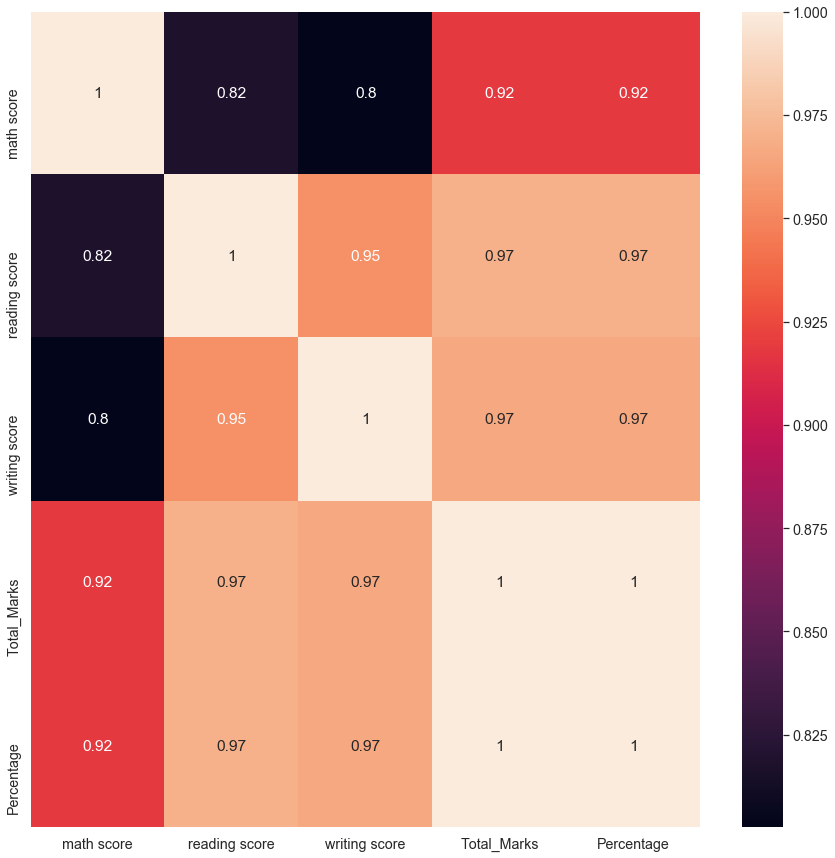

In [61]:
sns.heatmap(df.corr(), annot=True)

- check null values

In [29]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- show count Gender

In [67]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

- Gender show bar plot

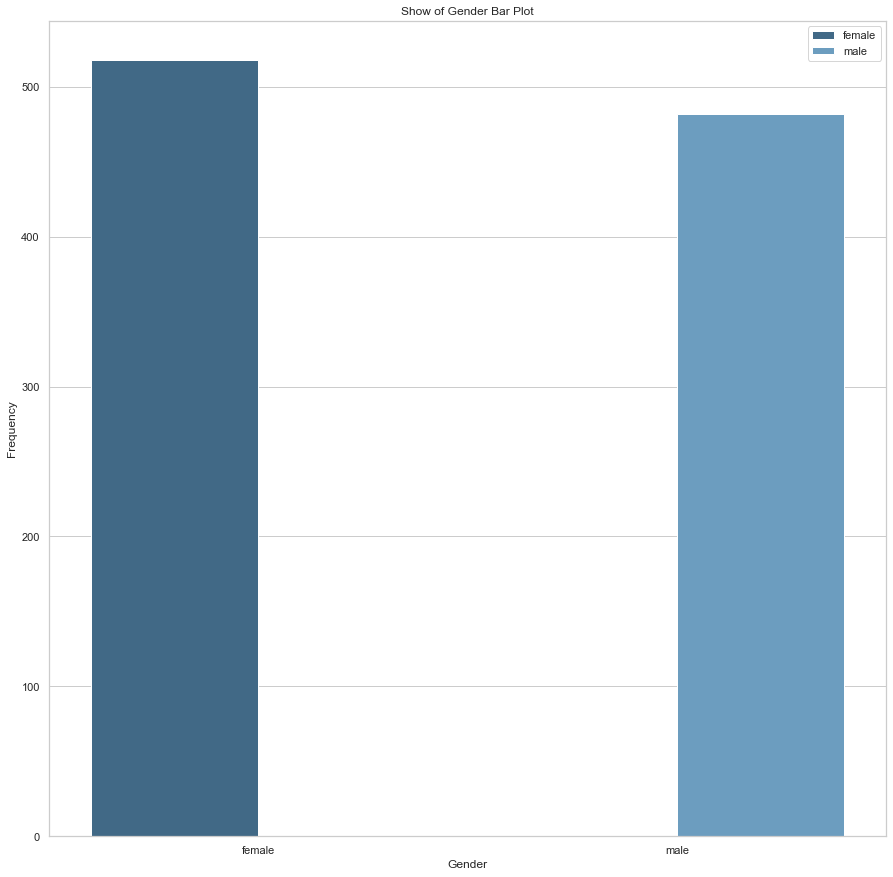

In [70]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette="Blues_d",hue=['female','male'])

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

<Figure size 864x504 with 0 Axes>

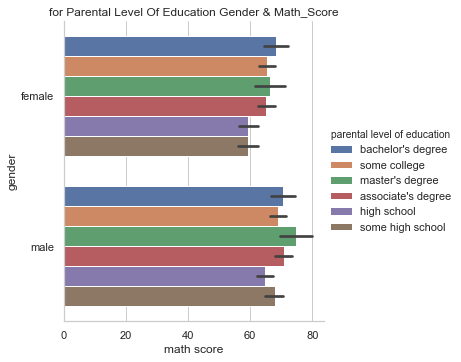

In [80]:
plt.figure(figsize=(12,7))
sns.catplot(y="gender", x="math score",
                 hue="parental level of education",
                 data=df, kind="bar")
plt.title('for Parental Level Of Education Gender & Math_Score')
plt.show()

<Figure size 864x504 with 0 Axes>

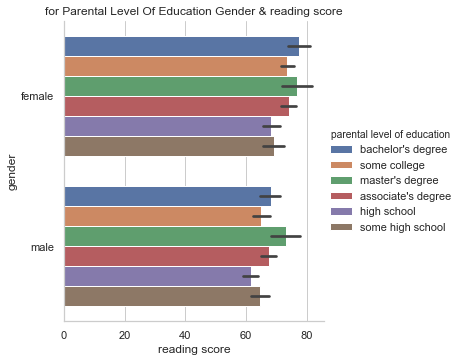

In [81]:
plt.figure(figsize=(12,7))
sns.catplot(y="gender", x="reading score",
                 hue="parental level of education",
                 data=df, kind="bar")
plt.title('for Parental Level Of Education Gender & reading score')
plt.show()

<Figure size 864x504 with 0 Axes>

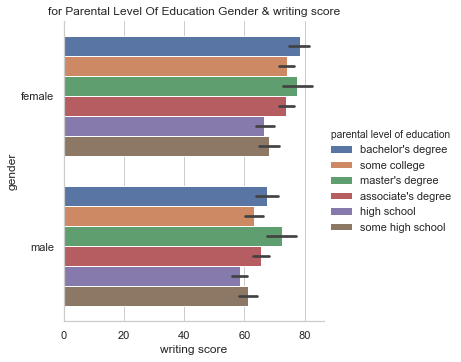

In [82]:
plt.figure(figsize=(12,7))
sns.catplot(y="gender", x="writing score",
                 hue="parental level of education",
                 data=df, kind="bar")
plt.title('for Parental Level Of Education Gender & writing score')
plt.show()

<Figure size 720x720 with 0 Axes>

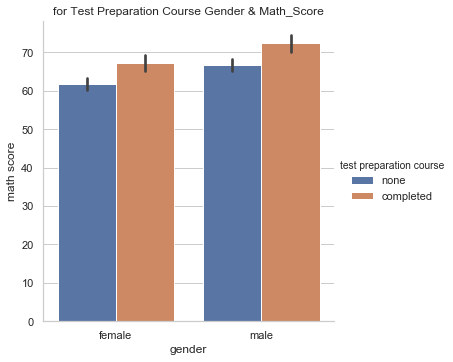

In [84]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="math score",
                 hue="test preparation course",
                 data=df, kind="bar")
plt.title('for Test Preparation Course Gender & Math_Score')
plt.show()

<Figure size 720x720 with 0 Axes>

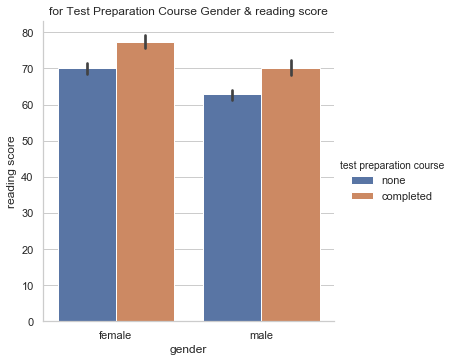

In [86]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="reading score",
                 hue="test preparation course",
                 data=df, kind="bar")
plt.title('for Test Preparation Course Gender & reading score')
plt.show()

<Figure size 720x720 with 0 Axes>

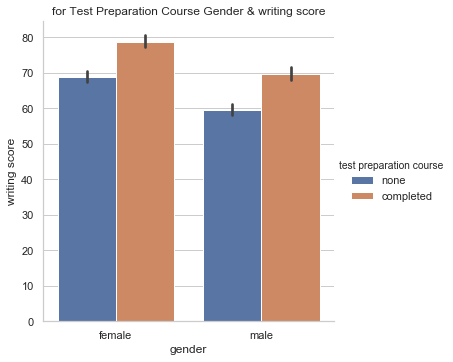

In [85]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="writing score",
                 hue="test preparation course",
                 data=df, kind="bar")
plt.title('for Test Preparation Course Gender & writing score')
plt.show()

## explore the math scores

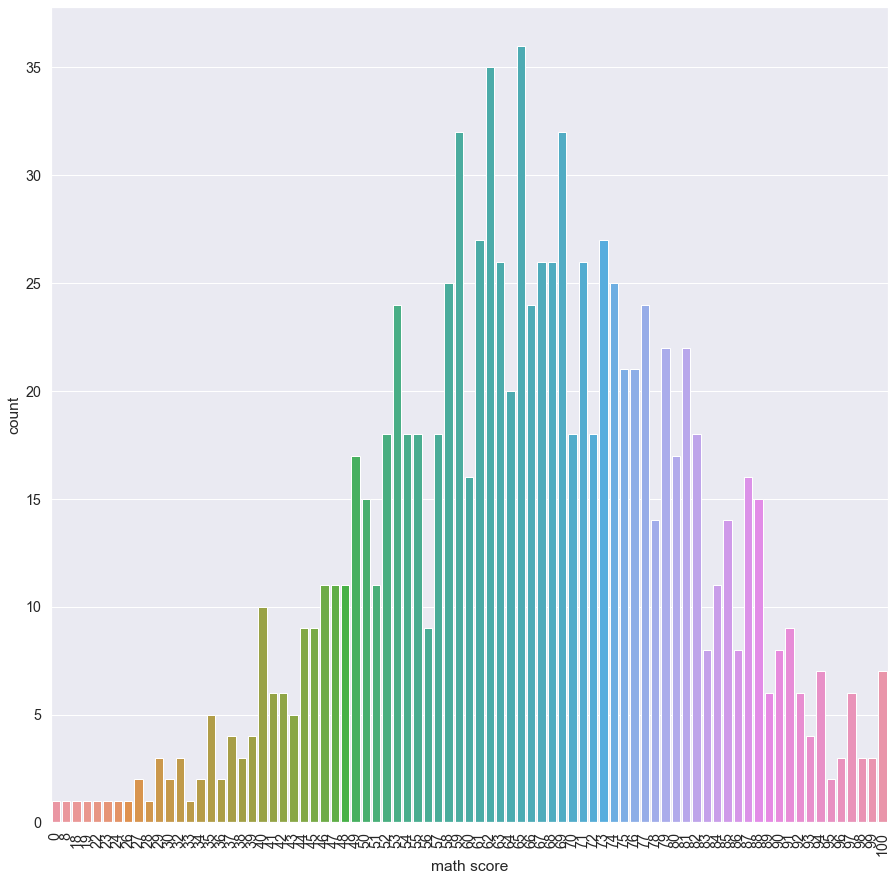

In [39]:
p = sns.countplot(x="math score", data = df)
p = plt.setp(p.get_xticklabels(), rotation=90)

# the students who passed in Math exam ?

In [34]:
df['Math_PassStatus'] = np.where(df['math score']<40, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

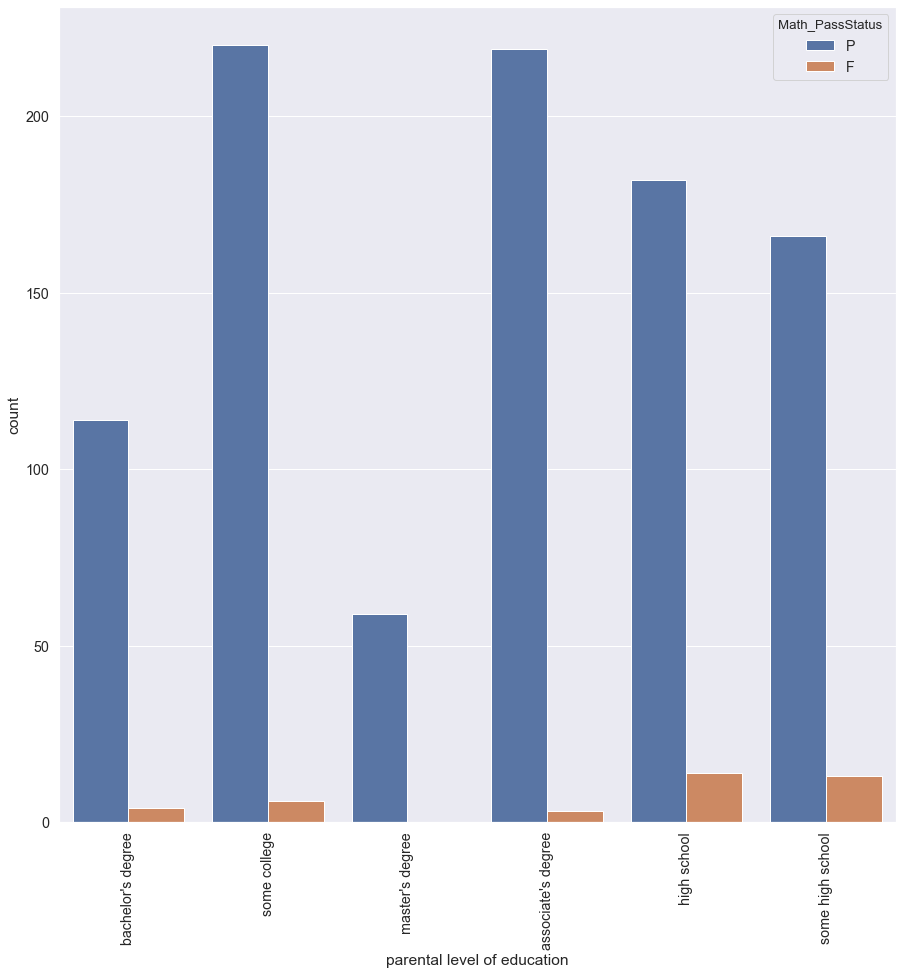

In [38]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

## explore the Reading score

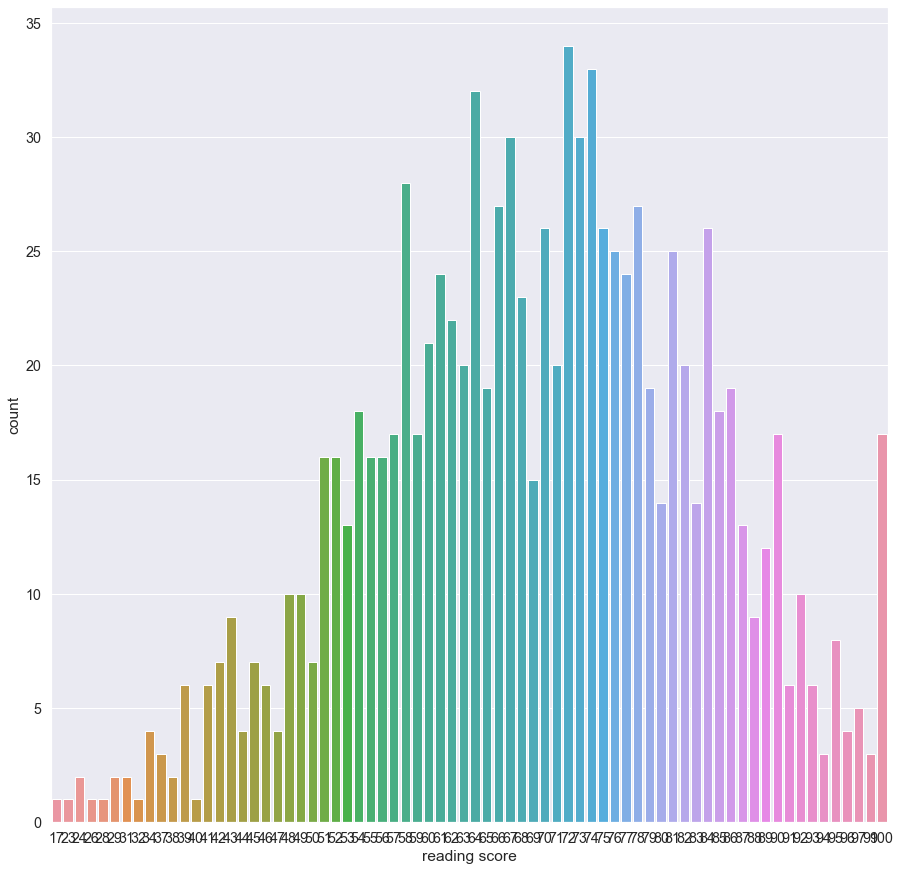

In [41]:
sns.countplot(x="reading score", data = df)
plt.show()

## How many studends passed in reading ?

In [44]:
df['Reading_PassStatus'] = np.where(df['reading score']<40, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

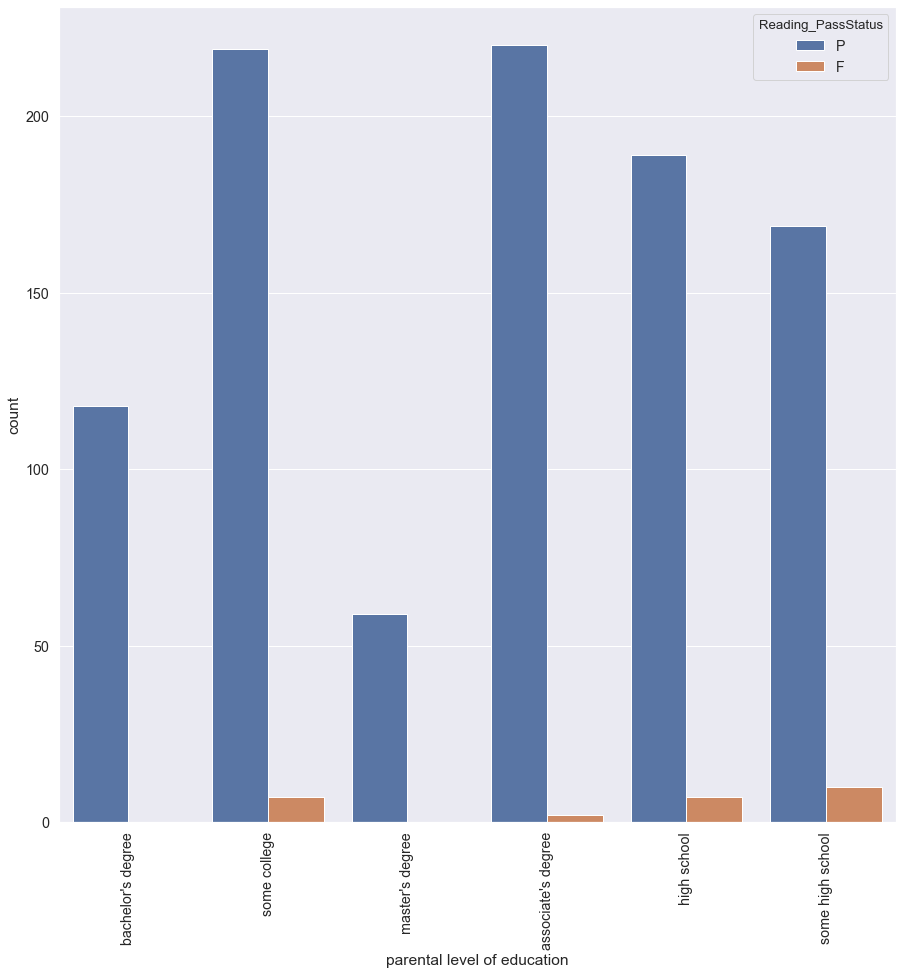

In [45]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus')
p = plt.setp(p.get_xticklabels(), rotation=90)

## explore writing score

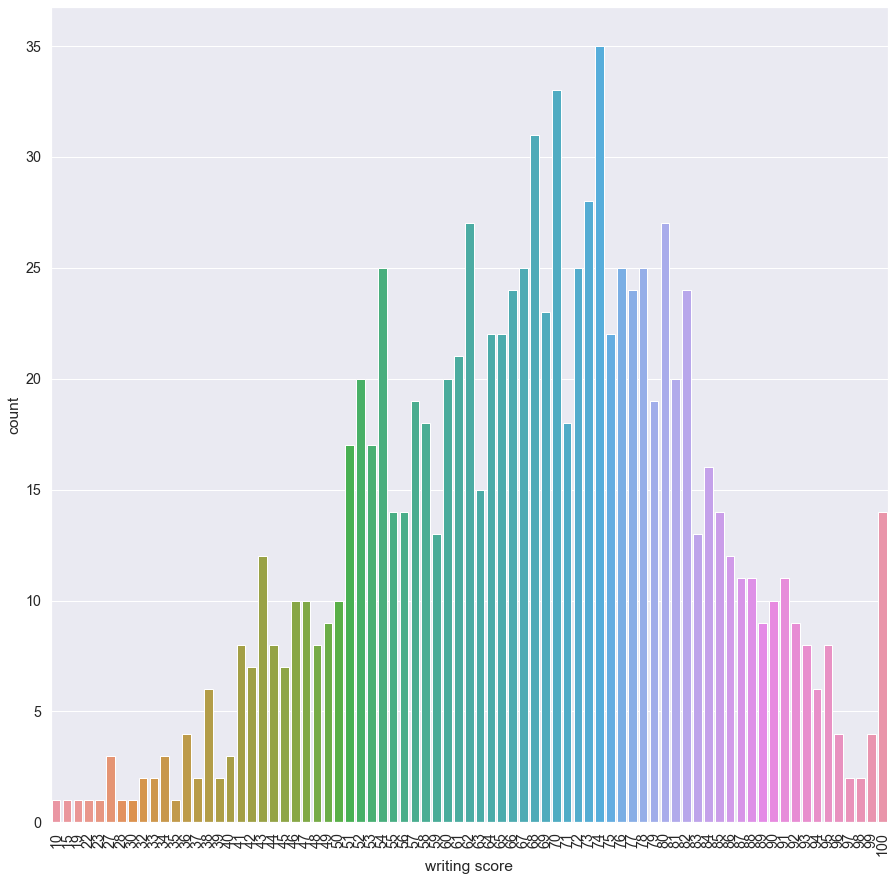

In [46]:
p = sns.countplot(x="writing score", data = df)
p = plt.setp(p.get_xticklabels(), rotation=90)

## How many students passed writing ?

In [48]:
df['Writing_PassStatus'] = np.where(df['writing score']<40, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

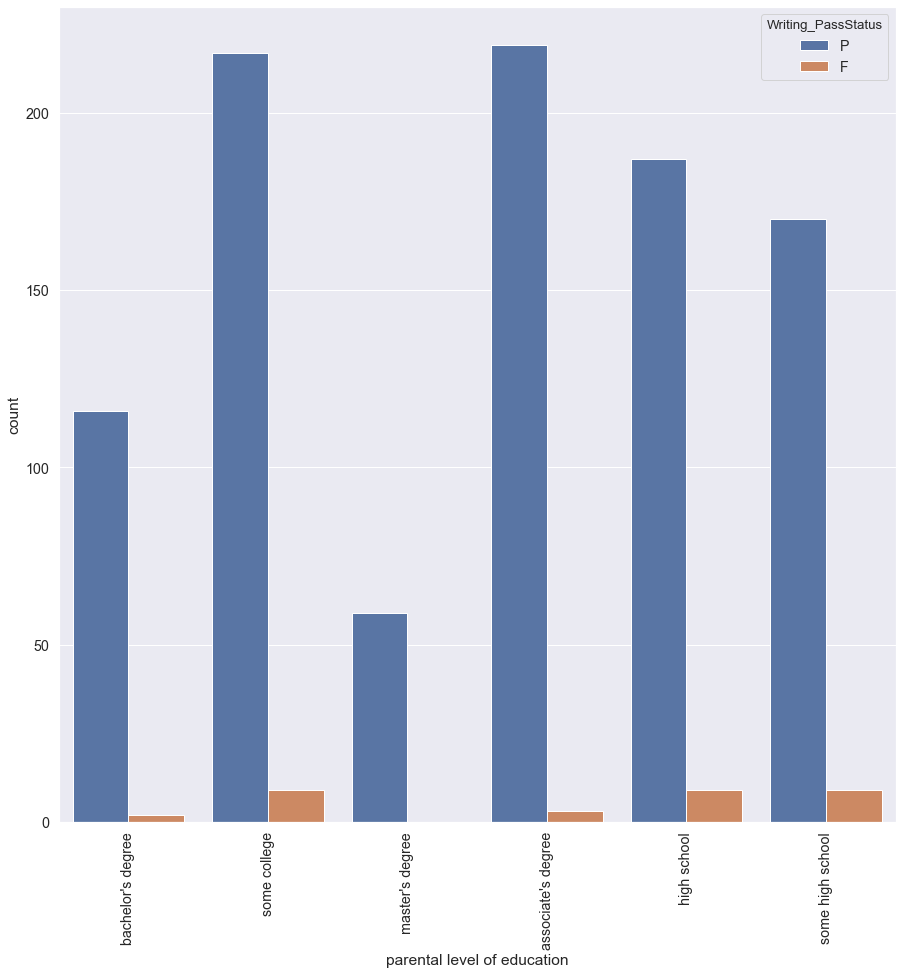

In [49]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus')
p = plt.setp(p.get_xticklabels(), rotation=90) 

## How many students passed in all the subjects ?

In [50]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

In [51]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P


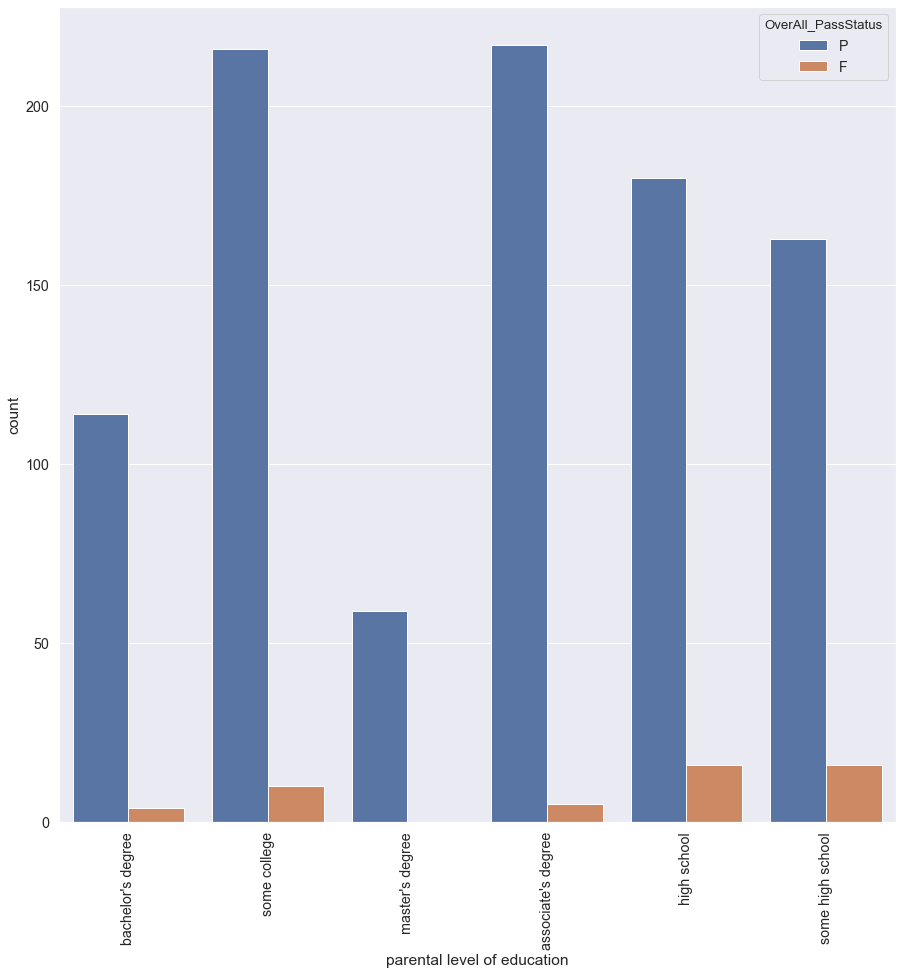

In [52]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus')
p = plt.setp(p.get_xticklabels(), rotation=90) 

## Find the percentage of marks

In [53]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

In [54]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P,223,74.333333


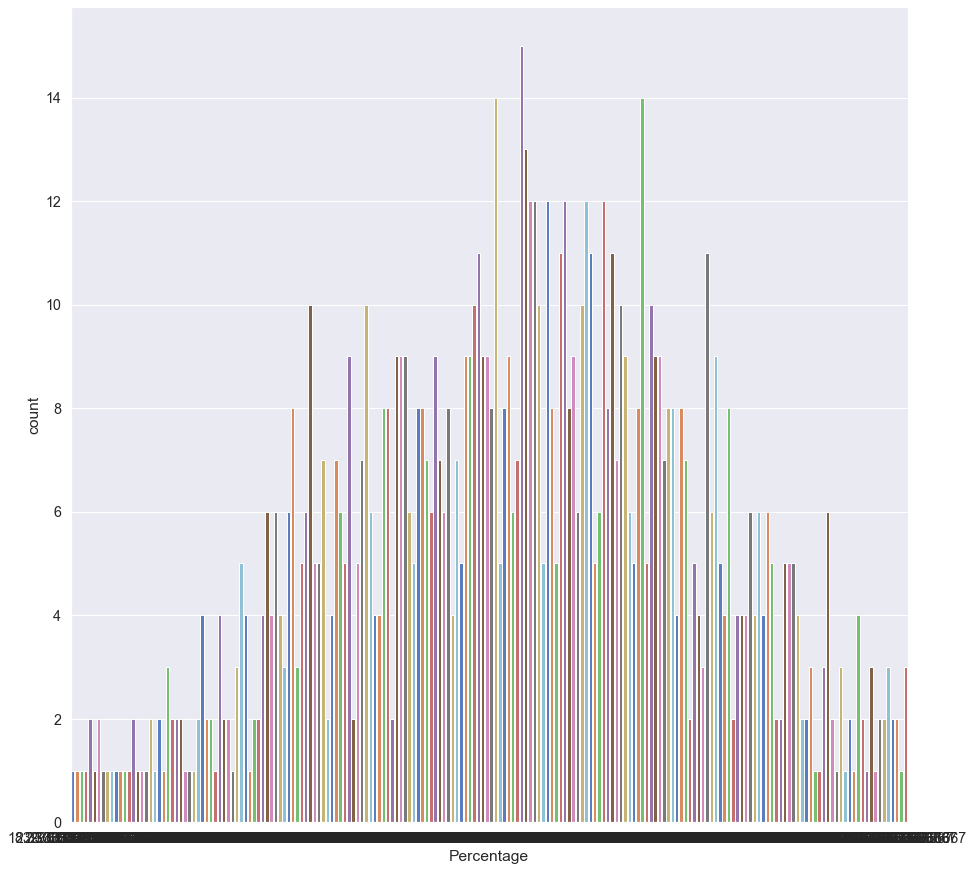

In [55]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
p = plt.setp(p.get_xticklabels(), rotation=0) 

## i will assign the grades
### Grading
- above 80 = A Grade
- 70 to 80 = B Grade
- 60 to 70 = C Grade
- 50 to 60 = D Grade
- 40 to 50 = E Grade
- below 40 = F Grade ( means Fail )

In [56]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

In [57]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P,282,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P,172,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P,195,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P,223,74.333333,B


# plot the grades in a order

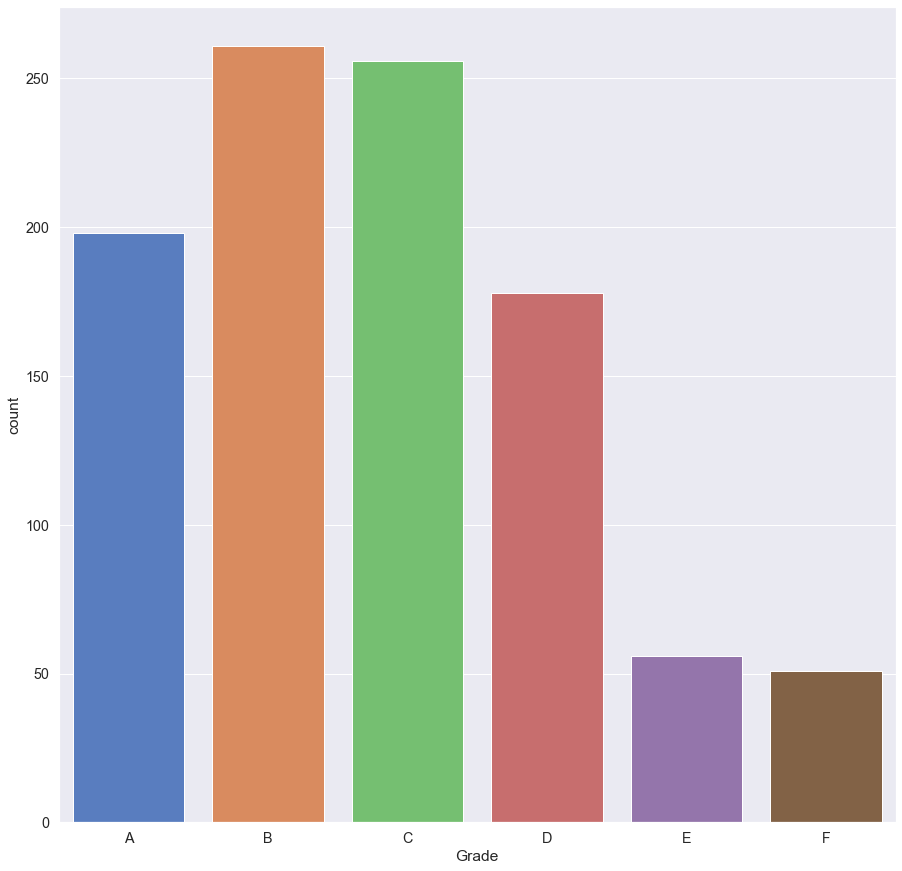

In [58]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

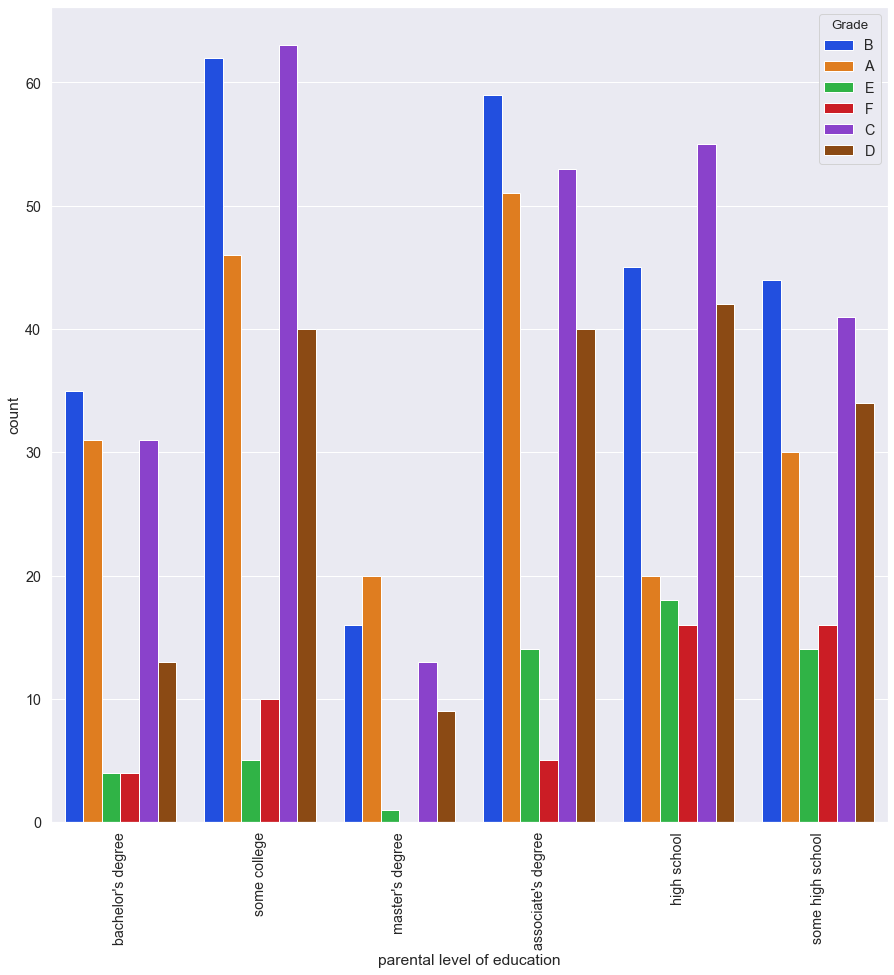

In [59]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
p = plt.setp(p.get_xticklabels(), rotation=90) 